In [108]:
import numpy as np
import pandas as pd
import seaborn as sb
from scipy.stats import entropy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [109]:
all_keypoint_metrics = pd.read_csv("Data/all_keypoint_metrics.csv").iloc[:4845, :]

ori_AU_consistency = np.loadtxt("Data/AU_consistency.txt") 

In [110]:
Avg_t = np.array(all_keypoint_metrics['Avg_t'])
Max_t = np.array(all_keypoint_metrics['Max_t'])
Avg_t2 = np.array(all_keypoint_metrics['Avg_t2'])
Max_t2 = np.array(all_keypoint_metrics['Max_t2'])
t2_with_PCA = np.array(all_keypoint_metrics['t2_with_PCA'])

### Computing all the regression plots

Avg_t 0.7794141836155023
Max_t 0.665358664931554
Avg_t2 0.7570660630065159
Max_t2 0.6088739643898027
t2_with_PCA 0.6067420158046326


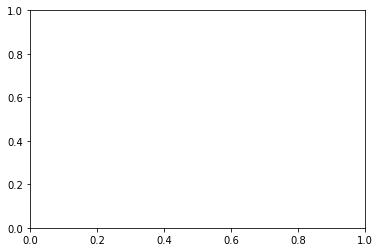

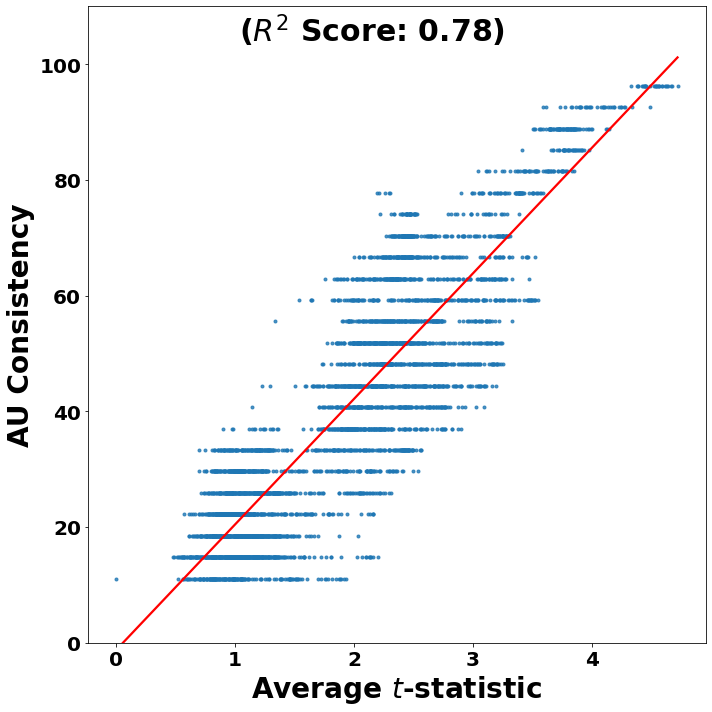

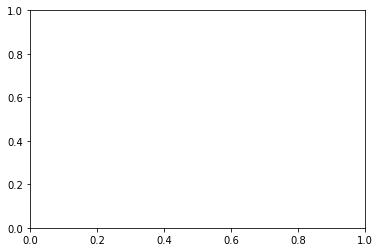

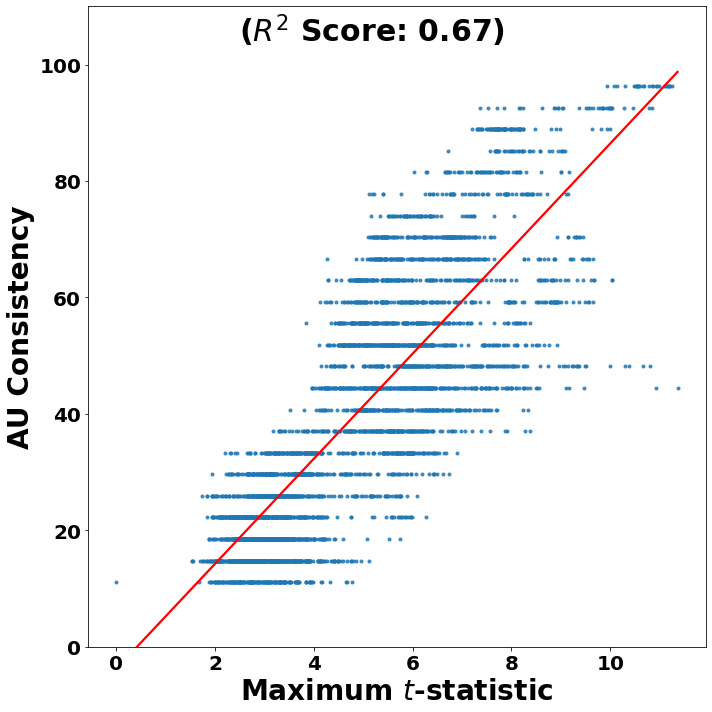

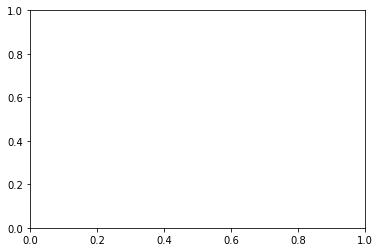

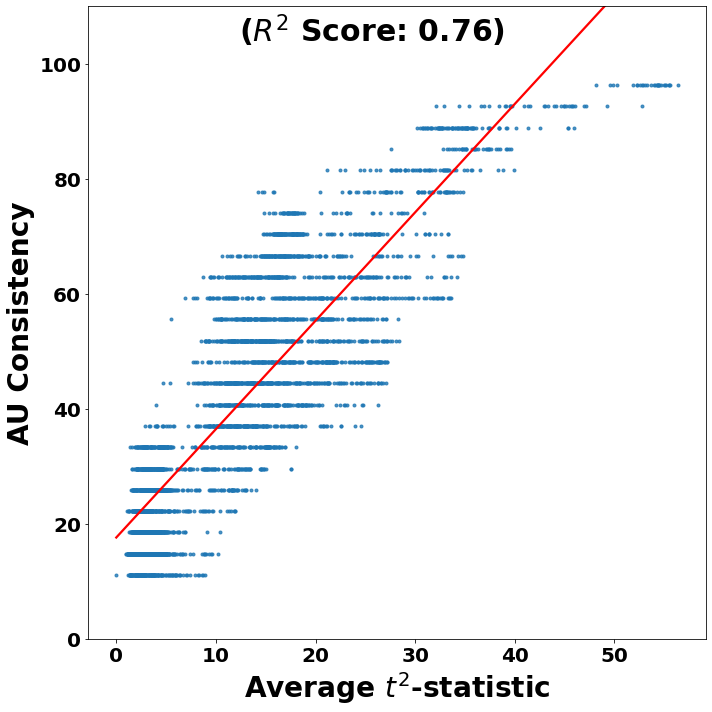

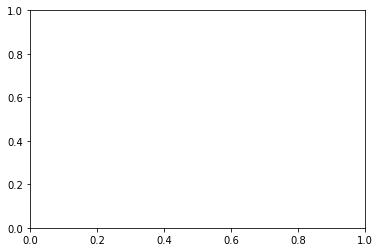

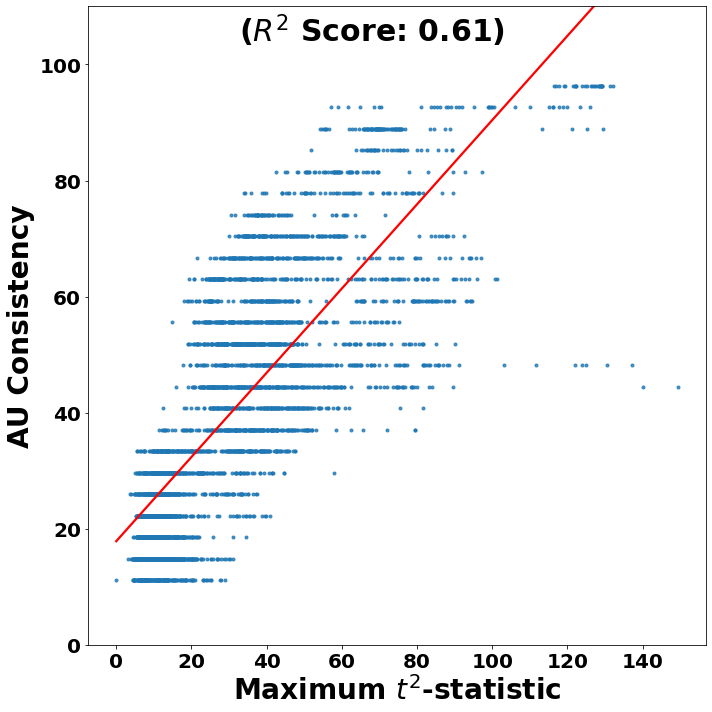

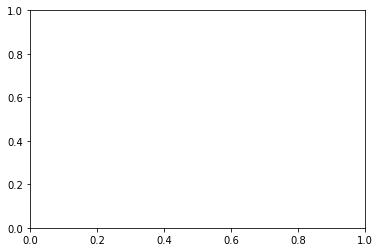

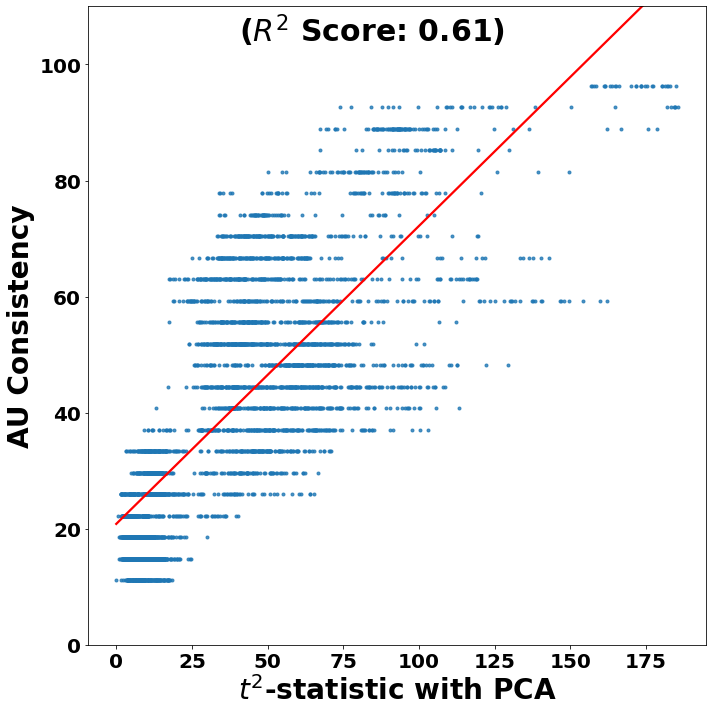

In [111]:
AU_consistency = 100*ori_AU_consistency/27
df_temp = pd.DataFrame(AU_consistency, columns=['AU_consistency'])
df_temp = pd.concat([df_temp, all_keypoint_metrics], axis=1)
  
metric_dict = {'Avg_t':"Average $\it{t}$-statistic", 'Max_t':"Maximum $\it{t}$-statistic", 'Avg_t2':"Average $\it{t}^{2}$-statistic", 'Max_t2':"Maximum $\it{t}^{2}$-statistic", 't2_with_PCA':"$t^{2}$-statistic with PCA"}

for metric in metric_dict.keys():
    
    t_arr = np.array(all_keypoint_metrics[metric])
    
    reg = LinearRegression().fit(t_arr.reshape(-1,1), AU_consistency.reshape(-1,1))
    r2_score = reg.score(t_arr.reshape(-1,1), AU_consistency.reshape(-1,1))
    print(metric, r2_score)
    
    fig, ax = plt.subplots()
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    
    # all the plt features will work if placed after lmplot function
    sb.lmplot(x = metric,
                y = "AU_consistency", 
                ci = None,
                data = df_temp, height=10, aspect=1, markers=".", line_kws={'color': 'red'})
    plt.ylim(0,110)
#     plt.xlim(0,5.5)
    plt.xlabel(metric_dict[metric], fontsize=28, fontweight='bold')
    plt.ylabel("AU Consistency", fontsize=28, fontweight='bold')
#     plt.rcParams["axes.edgecolor"] = "black"
#     plt.rcParams["figure.autolayout"] = True
    plt.gca().spines['top'].set_visible(True)
    plt.gca().spines['right'].set_visible(True)
    
    # Set font and weight for xticks and yticks
    plt.xticks(fontsize=20, fontweight='bold')
    plt.yticks(fontsize=20, fontweight='bold')

#     plt.legend([f'$R^2$ Score: {round(r2_score, 2)}'], loc='upper right', fontsize=20, title='Legend Title')
#     plt.text(0.95, 2.97, r'($R^2$ Score: {0:.2f})'.format(round(r2_score, 2)), ha='center', va='center', transform=ax.transAxes, fontsize=20, fontweight='bold')
    plt.text(0.95, 2.97, f'($R^2$ Score: {round(r2_score, 2)})', ha='center', va='center', transform=ax.transAxes, fontsize=30, fontweight='bold')    
    
    # Increase padding between xlabel and xticks
#     fig.subplots_adjust(bottom=-0.4)
    # Increase padding between xlabel and xticks
#     ax.xaxis.labelpad = 80  # Adjust the value as needed

    # Increase padding between xlabel and xticks
    plt.subplots_adjust(bottom=0.2)  # Adjust the value as needed


    plt.tight_layout()  # Add this line to adjust layout
#     plt.show()
#     plt.savefig("Results/Regression/"+metric+".svg", dpi=300)
#     plt.close()

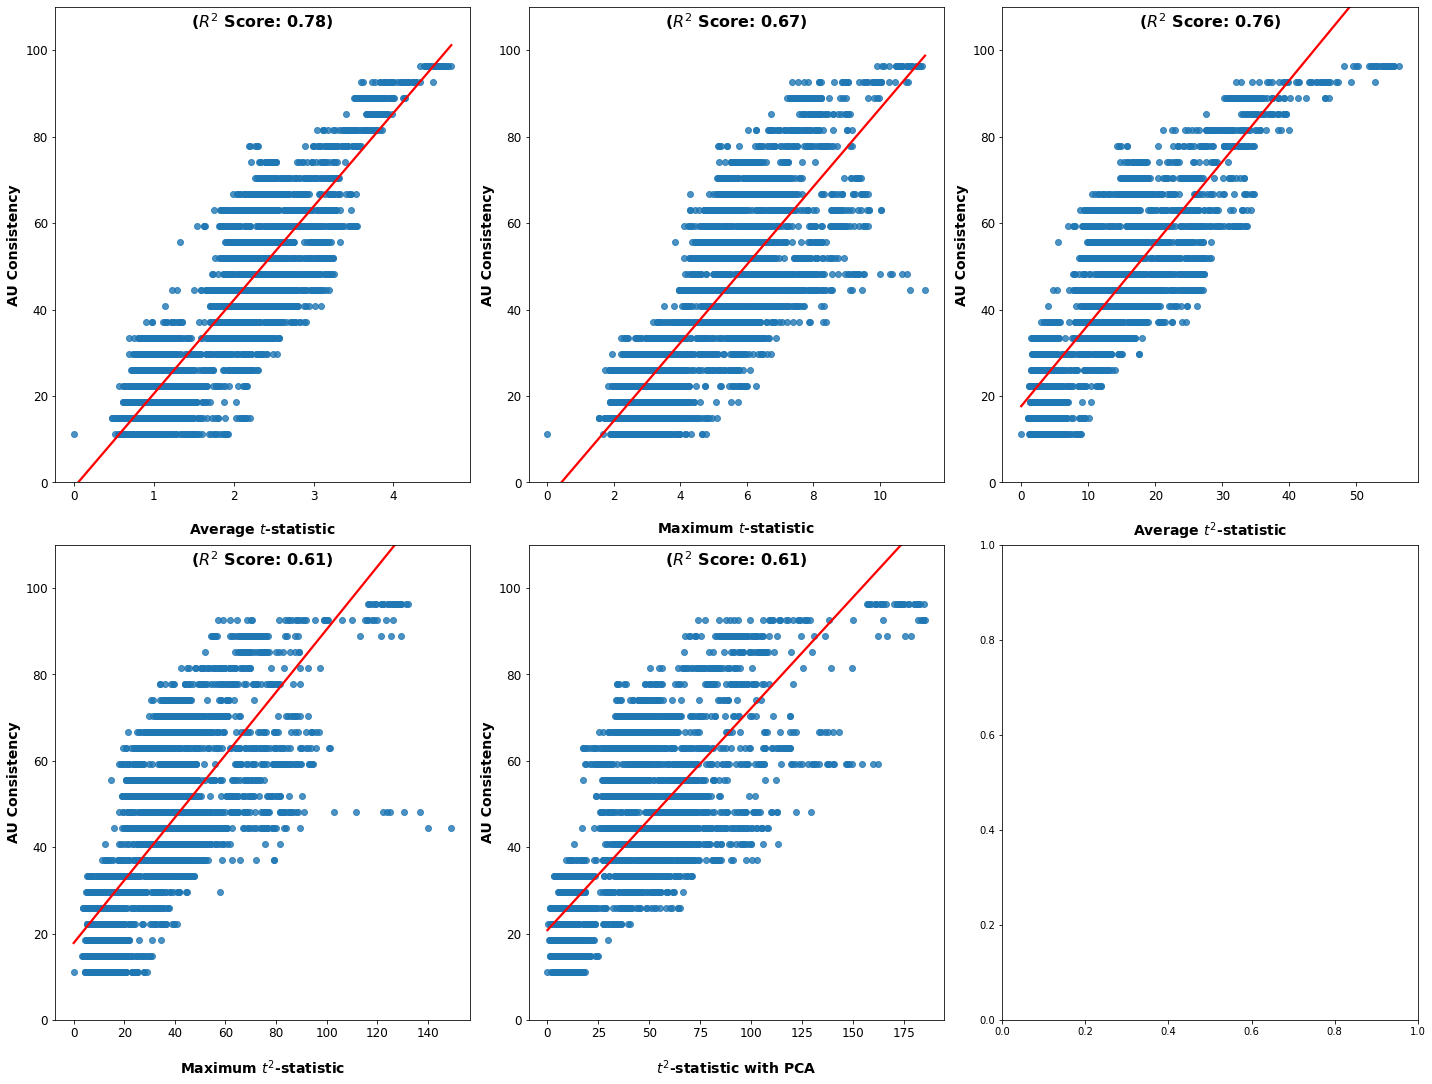

In [112]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

AU_consistency = 100 * ori_AU_consistency / 27
df_temp = pd.DataFrame(AU_consistency, columns=['AU_consistency'])
df_temp = pd.concat([df_temp, all_keypoint_metrics], axis=1)

metric_dict = {
    'Avg_t': "Average $\it{t}$-statistic",
    'Max_t': "Maximum $\it{t}$-statistic",
    'Avg_t2': "Average $\it{t}^{2}$-statistic",
    'Max_t2': "Maximum $\it{t}^{2}$-statistic",
    't2_with_PCA': "$t^{2}$-statistic with PCA"
}

fig, axes = plt.subplots(2, 3, figsize=(20, 15))
fig.subplots_adjust(hspace=0.5)

for idx, metric in enumerate(metric_dict.keys()):
    t_arr = np.array(all_keypoint_metrics[metric])

    reg = LinearRegression().fit(t_arr.reshape(-1, 1), AU_consistency.reshape(-1, 1))
    r2_score = reg.score(t_arr.reshape(-1, 1), AU_consistency.reshape(-1, 1))

    if idx == 5:  # Skip the subplot at index (1, 2)
        axes[1, 2].axis('off')
        continue

    ax = axes[idx // 3, idx % 3]
    sb.regplot(x=metric, y="AU_consistency", ci=None, data=df_temp, ax=ax, line_kws={'color': 'red'})

    ax.set_ylim(0, 110)
    ax.set_xlabel(metric_dict[metric], fontsize=14, fontweight='bold')
    ax.set_ylabel("AU Consistency", fontsize=14, fontweight='bold')

    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)

    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.text(0.50, 0.97, f'($R^2$ Score: {round(r2_score, 2)})', ha='center', va='center', transform=ax.transAxes, fontsize=16, fontweight='bold')
    ax.xaxis.set_label_coords(0.5, -0.08)

plt.tight_layout()

# Save as PDF for vector format
plt.savefig("Results/Regression/all_metrics.pdf", dpi=300)

# Save as PNG for raster format
plt.savefig("Results/Regression/all_metrics.png", dpi=300)

plt.show()


### Computing the R2 score

In [113]:
for t_arr in [Avg_t, Max_t, Avg_t2, Max_t2, t2_with_PCA]:
    reg = LinearRegression().fit(t_arr.reshape(-1,1), AU_consistency.reshape(-1,1))
    print(reg.score(t_arr.reshape(-1,1), AU_consistency.reshape(-1,1)))

0.7794141836155023
0.665358664931554
0.7570660630065159
0.6088739643898027
0.6067420158046326


In [114]:
emotions_dict = {"Happy1":['thistle',[64,341]],
                 "Happy2":['lavender',[342, 815]],
                 "Surprise1":['mediumpurple',[816, 1225]],
                 "Fear":['slateblue',[1226, 1412]], 
                 "Disgust1":['lightgrey',[1413, 1933]],
                 "Disgust2":['royalblue',[1934, 2513]], 
                 "Sadness1":['deepskyblue',[2514, 3259]],
                 "Sadness2":['lightsteelblue',[3260, 3993]], 
                 "Surprise2":['cornflowerblue',[3994, 4831]]}

### comparing Avg t-statistic and AU consistency along the video timeline

In [115]:
# y = reg.predict(avg_disfa_t.reshape(-1,1))
y = AU_consistency.reshape(-1,1)
y = y/np.amax(y)
print(y.shape)
# y = avg_selfdisfa3741_t.reshape(-1,1)
x = np.arange(0, y.shape[0], 1)
plt.figure(figsize=(20,10))
mx=1.1
plt.ylim(0,mx)

plt.xticks(np.arange(0, 5001, 500))

# Set font and weight for xticks and yticks
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')


# fig, axes = plt.subplot(1,1)
for key in emotions_dict:
    color = emotions_dict[key][0]
    emotion = key
    a, b = emotions_dict[key][1][0], emotions_dict[key][1][1] 
    plt.fill_between(x, 0, mx*np.ones(y.shape[0]), np.multiply(x>=a,x<b), color=color, label=emotion)
# legend1 = plt.legend(loc='upper right', prop={'weight':'bold','size':14})
legend1 = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'weight':'bold', 'size':39.5})
# plt.plot(x, y, color='blue', label='DISFA')
# plt.legend(loc='upper left')
# y2 = reg.predict(avg_selfdisfa_t.reshape(-1,1))
y2 = Avg_t.reshape(-1,1)
y2 = y2/np.amax(y2)
plt.plot(x, y, color='navy', label='AU consistency')
plt.plot(x, y2, color='purple', label='Average t-statistic')
# plt.plot(x, y, color='tab:orange', label='AU consistency')
# plt.plot(x, y2, color='tab:green', label='Average t-statistic')
plt.legend(['AU consistency','Average t-statistic'],loc='upper right', prop={'weight':'bold','size':20})
# Uncomment the below line to add the emotion color labels on side
plt.gca().add_artist(legend1)
plt.xlabel("Video Timeline (in Frames)", fontsize=30, fontweight='bold', labelpad=20)
plt.ylabel("Consistency", fontsize=30, fontweight='bold')
# plt.vlines([191,771,1718], 0, [mx,mx,mx], linestyle="dashed", color='black')
# plt.xticks(np.concatenate((np.arange(0,5000,1000),np.array([191, 771, 1718]))))
y_intercept=2.04
# plt.axhline(y=y_intercept, linestyle='--', color='gray')
# plt.text(0.1, y_intercept+0.07, f'y={y_intercept}', ha='right', va='center')
# plt.show()
ax.xaxis.set_label_coords(0.5, -0.10)
# plt.show()
plt.savefig("Results/compare_AUconsistency_vs_Avgt.pdf", dpi=300, bbox_inches='tight')
plt.close()

(4845, 1)


### Creating class distribution of all the metrics

In [116]:
emotions_dict = {"Happy1":['thistle',[64,341]],
                 "Happy2":['lavender',[342, 815]],
                 "Surprise1":['mediumpurple',[816, 1225]],
                 "Fear":['slateblue',[1226, 1412]], 
                 "Disgust1":['lightgrey',[1413, 1933]],
                 "Disgust2":['royalblue',[1934, 2513]], 
                 "Sadness1":['deepskyblue',[2514, 3259]],
                 "Sadness2":['lightsteelblue',[3260, 3993]], 
                 "Surprise2":['cornflowerblue',[3994, 4831]]}

In [117]:
# Define quartiles function
def calculate_quartiles(arr):
    q1 = np.percentile(arr, 30)
    q2 = np.percentile(arr, 60)
    q3 = np.percentile(arr, 90)
    return q1, q2, q3


q1, q2, q3 = calculate_quartiles(x)

# Categorize values
category = np.zeros_like(x, dtype=int)
category[x < q1] = 1
category[(x >= q1) & (x < q2)] = 2
category[(x >= q2) & (x < q3)] = 3
category[x >= q3] = 4
percentages = np.array([np.round(np.mean(category == i) * 100) for i in range(1, 5)])
print(percentages)


percentages_list = []
for x in [AU_consistency, Avg_t, Max_t, Avg_t2, Max_t2, t2_with_PCA]:

    # Create a DataFrame to store the results
    result_df = pd.DataFrame(columns=["Inconsistent", "Low Consistent", "Mild Consistent", "High Consistent"])

    # Iterate through each emotion in the dictionary
    for emotion, (color, index_range) in emotions_dict.items():
        start_index, end_index = index_range

        # Extract values within the specified index range
        subset = x[start_index:end_index]

        # Calculate quartiles
        q1, q2, q3 = calculate_quartiles(x)
#         print(np.amin(x), q1, q2, q3, np.amax(x))

        # Categorize values
        category = np.zeros_like(subset, dtype=int)
        category[subset < q1] = 1
        category[(subset >= q1) & (subset < q2)] = 2
        category[(subset >= q2) & (subset < q3)] = 3
        category[subset >= q3] = 4

        # Calculate percentages
        percentages = np.array([int(np.round(np.mean(category == i) * 100)) for i in range(1, 5)])

        # Add row to the DataFrame
        result_df.loc[emotion] = percentages
        # Add mean, max, and min for each column
    percentages_list.append(result_df.to_numpy(dtype=np.float))
    # Display the result
#     result_df.loc['Mean'] = result_df.mean()
#     result_df.loc['Max'] = result_df.max()
#     result_df.loc['Min'] = result_df.min()
    print(result_df)


[30. 30. 30. 10.]
          Inconsistent Low Consistent Mild Consistent High Consistent
Happy1               6             14               6              74
Happy2               0             14              60              27
Surprise1            0             17              77               6
Fear                 0             20              69              11
Disgust1             1             45              49               5
Disgust2             1             22              77               0
Sadness1            89             11               0               0
Sadness2           100              0               0               0
Surprise2           33             31              19              16
          Inconsistent Low Consistent Mild Consistent High Consistent
Happy1               0             17              13              70
Happy2               0             13              56              30
Surprise1            0             21              75               4
Fe

### Computing KL-divergence between the tables

In [118]:
# Ensure that all elements in percentages_list are NumPy arrays
for array in percentages_list:
    if not isinstance(array, np.ndarray):
        raise ValueError("All elements in percentages_list should be NumPy arrays.")

# Extract the first array
first_array = percentages_list[0]

# Extract Category rows from the first array
category_rows_first_array = [first_array[i, :] for i in range(9)]

# Extract the last five arrays
last_five_arrays = percentages_list[1:]

# Initialize a 5x9 matrix to store KL divergences
kl_divergences_matrix = np.zeros((5, 9))

# Calculate KL divergence for each combination of Category rows
for i, category_row_first_array in enumerate(category_rows_first_array):
    for j, array in enumerate(last_five_arrays):
        category_row_array = array[i, :]
#         print(category_row_array, category_row_first_array)
        # Add a small epsilon to avoid division by zero
        epsilon = 1e-10
        kl_divergence = entropy(category_row_first_array/100 + epsilon, category_row_array/100 + epsilon)
#         kl_divergence = entropy(category_row_array/100 + epsilon, category_row_first_array/100 + epsilon)
        kl_divergences_matrix[j, i] = kl_divergence

# Display the KL Divergences matrix
print("KL Divergences Matrix:")
print(kl_divergences_matrix)

# Compute the average of each row
average_divergences_per_row = np.mean(kl_divergences_matrix, axis=1)

# Display the average divergences
print("\nAverage KL Divergences per Row:")
print(average_divergences_per_row)


KL Divergences Matrix:
[[1.18029487e+00 3.09190732e-03 8.66968795e-03 2.30119237e+00
  4.12052196e-01 5.91623125e-01 1.31862586e-01 3.01105090e-01
  3.35670028e+00]
 [1.49833431e+00 2.58414607e-02 2.41141709e-01 2.59737059e+00
  5.14176295e-01 2.94051037e-01 1.32890448e-01 2.35722331e-01
  3.28156774e+00]
 [1.21908034e+00 6.48155203e-03 2.31773167e-02 2.34934586e+00
  4.21428889e-01 5.34702463e-01 1.22062042e-01 3.01105090e-01
  3.35352304e+00]
 [1.51233326e+00 2.82435947e-03 1.87577598e-01 2.47536198e+00
  5.15376378e-01 3.44221342e-01 1.48631177e-01 2.87682070e-01
  3.31061549e+00]
 [1.47798733e+00 9.38605486e-02 1.94682627e-01 2.46069100e+00
  4.10222369e-01 3.49074439e-01 1.22062042e-01 2.48461357e-01
  3.28595451e+00]]

Average KL Divergences per Row:
[0.92073246 0.98012177 0.92565629 0.97606929 0.96033291]
